#Camelot Documentation On Google Colab

##Installing Important Libraries

In [1]:
!pip install ghostscript
!pip install camelot-py[cv]
!pip install excalibur-py
!apt install ghostscript python3-tk

     |████████████████████████████████| 40 kB 25 kB/s 
     |████████████████████████████████| 5.6 MB 26.2 MB/s 
     |████████████████████████████████| 77 kB 6.1 MB/s 
     |████████████████████████████████| 11.7 MB 34.3 MB/s 
     |████████████████████████████████| 3.2 MB 34.1 MB/s 
  Created wheel for PyPDF2: filename=PyPDF2-1.26.0-py3-none-any.whl size=61100 sha256=4eedea4510a17567222d5f6655a7a9004d6b3c6bb59a2bd996f4f51a0f6ce3e1
  Stored in directory: /root/.cache/pip/wheels/80/1a/24/648467ade3a77ed20f35cfd2badd32134e96dd25ca811e64b3
Successfully built PyPDF2
     |████████████████████████████████| 1.5 MB 33.5 MB/s 
     |████████████████████████████████| 327 kB 44.9 MB/s 
     |████████████████████████████████| 401 kB 43.7 MB/s 
     |████████████████████████████████| 187 kB 54.8 MB/s 
     |████████████████████████████████| 89 kB 7.5 MB/s 
     |████████████████████████████████| 53 kB 2.3 MB/s 
  Created wheel for click-didyoumean: filename=click_didyoumean-0.0.3-py3-none-any.whl

In [2]:
!pip install pdf2image

In [3]:
!apt-get install poppler-utils 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (365 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 161901 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [4]:
import camelot
from pdf2image import convert_from_path
import matplotlib.pyplot as plt


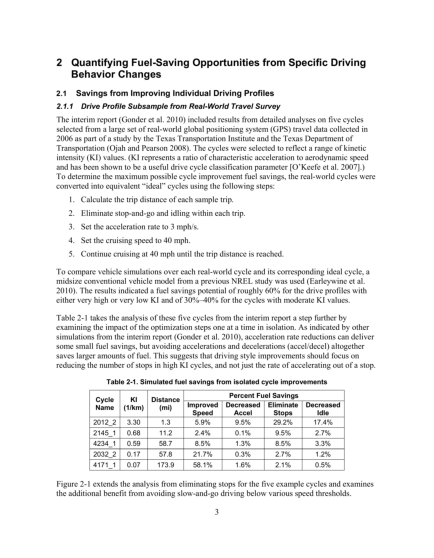

In [9]:
PDF = '/content/foo.pdf'
pdf_img = convert_from_path(PDF, dpi=300)[0]

plt.figure(figsize=(15, 10))
plt.axis('off')
plt.imshow(pdf_img)

In [11]:
tables =  camelot.read_pdf(PDF)

In [12]:
tables[0].df

,0,1,2,3,4,5,6
0,Cycle \nName,KI \n(1/km),Distance \n(mi),Percent Fuel Savings,,,
1,,,,Improved \nSpeed,Decreased \nAccel,Eliminate \nStops,Decreased \nIdle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%


In [13]:
tables[0].to_csv('foo.csv')

This will export the table as a CSV file at the path specified. In this case, it is foo.csv in the current directory.
You can also export all tables at once, using the tables object’s export() method.

In [14]:
tables.export('foo.csv', f='csv')

The export() method exports files with a page-*-table-* suffix. In the example above, the single table in
the list will be exported to foo-page-1-table-1.csv. If the list contains multiple tables, multiple CSV files will be
created. To avoid filling up your path with multiple files, you can use compress=True, which will create a single ZIP
file at your path with all the CSV files.

In [15]:
tables1 =  camelot.read_pdf("your.pdf")

In [16]:
tables1[0].df

,0,1,2,3,4,5,6,7,8,9
0,State,Nutritional Assessment \n(No. of individuals),,,,IYCF Practices \n(No. of mothers: \n2011-12),Blood Pressure \n(No. of adults: \n2011-12),,Fasting Blood Sugar \n(No. of adults:\n2011-12),
1,,1975-79,1988-90,1996-97,2011-12,,Men,Women,Men,Women
2,Kerala,5738,6633,8864,8297,245,2161,3195,1645,2391
3,Tamil Nadu,7387,10217,5813,7851,413,2134,2858,1119,1739
4,Karnataka,6453,8138,12606,8958,428,2467,2894,1628,2028
5,Andhra Pradesh,5844,9920,9545,8300,557,1899,2493,1111,1529
6,Maharashtra,5161,7796,6883,9525,467,2368,2648,1417,1599
7,Gujarat,4403,5374,4866,9645,477,2687,3021,2122,2503
8,Madhya Pradesh,*,*,*,7942,470,1965,2150,1579,1709
9,Orissa,3756,5540,12024,8473,398,2040,2624,1093,1628


To extract tables from encrypted PDF files you must provide a password when calling read_pdf().

In [17]:
# tables = camelot.read_pdf('foo.pdf', password='userpass')

Currently Camelot only supports PDFs encrypted with ASCII passwords and algorithm code 1 or 2.

To detect line segments, Lattice needs the lines that make the table to be in the foreground. Here’s an example of a
table with lines in the background:

In [18]:
tables_2 = camelot.read_pdf("background_lines.pdf", process_background = True)

In [19]:
tables_2

<TableList n=2>

In [20]:
tables_2[1].df

,0,1,2,3,4,5,6,7
0,State,Date,Halt \nstations,Halt \ndays,Persons \ndirectly \nreached\n(in lakh),Persons \ntrained,Persons \ncounseled,Persons \ntested\nfor HIV
1,Delhi,1.12.2009,8,17,1.29,"3,665","2,409","1,000"
2,Rajasthan,2.12.2009 to \n19.12.2009,,,,,,
3,Gujarat,20.12.2009 to \n3.1.2010,6,13,6.03,"3,810","2,317","1,453"
4,Maharashtra,4.01.2010 to \n1.2.2010,13,26,1.27,"5,680","9,027","4,153"
5,Karnataka,2.2.2010 to \n22.2.2010,11,19,1.80,"5,741","3,658","3,183"
6,Kerala,23.2.2010 to \n11.3.2010,9,17,1.42,"3,559","2,173",855
7,Total,,47,92,11.81,"22,455","19,584","10,644"


Visual debugging using plot() requires matplotlib which is an optional dependency. You can install it using $ pip install camelot-py[plot].

In [21]:
!pip install camelot-py[plot]

You can use the plot() method to generate a matplotlib plot of various elements that were detected on the PDF page while processing it. This can help you select table areas, column separators and debug bad table outputs, by tweaking different configuration parameters.

You can specify the type of element you want to plot using the kind keyword argument. The generated plot can be saved to a file by passing a filename keyword argument. The following plot types are supported:

‘text’

‘grid’

‘contour’

‘line’

‘joint’

‘textedge’

‘line’ and ‘joint’ can only be used with Lattice and ‘textedge’ can only be used with Stream.



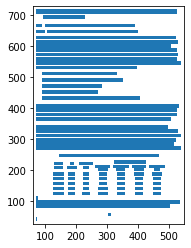

In [22]:
camelot.plot(tables[0], kind='text').show()

This, as we shall later see, is very helpful with Stream for noting table areas and column separators, in case Stream does not guess them correctly.



Let’s plot the table (to see if it was detected correctly or not). This plot type, along with contour, line and joint is useful for debugging and improving the extraction output, in case the table wasn’t detected correctly. (More on that later.)



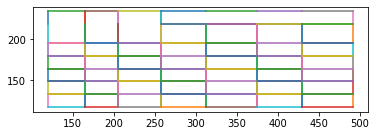

In [23]:
camelot.plot(tables[0], kind='grid').show()

contour¶
Now, let’s plot all table boundaries present on the table’s PDF page.

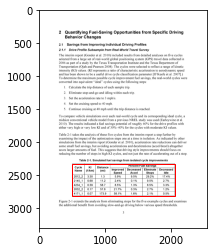

In [24]:
camelot.plot(tables[0], kind='contour').show()

line¶
Cool, let’s plot all line segments present on the table’s PDF page.

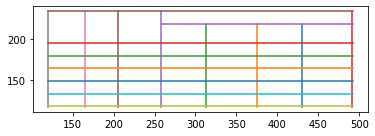

In [25]:
camelot.plot(tables[0], kind='line').show()

joint¶
Finally, let’s plot all line intersections present on the table’s PDF page.



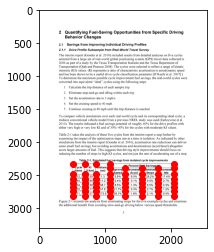

In [26]:
camelot.plot(tables[0], kind='joint').show()

textedge
You can also visualize the textedges found on a page by specifying kind='textedge'. To know more about what a “textedge” is, you can see pages 20, 35 and 40 of Anssi Nurminen’s master’s thesis.



In [27]:
table_foo = camelot.read_pdf("foo.pdf", flavor="stream")

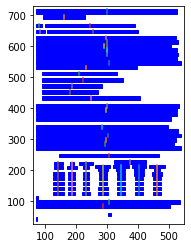

In [28]:
camelot.plot(table_foo[0], kind='textedge').show()

Specify table areas¶
In cases such as these, it can be useful to specify exact table boundaries. You can plot the text on this page and note the top left and bottom right coordinates of the table.

Table areas that you want Camelot to analyze can be passed as a list of comma-separated strings to read_pdf(), using the table_areas keyword argument.

In [29]:
tables_tb_area = camelot.read_pdf("table_areas.pdf", pages="all", flavor="stream")

In [30]:
tables_tb_area

<TableList n=4>

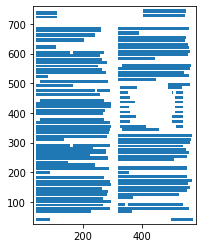

In [31]:
camelot.plot(tables_tb_area[1], kind='text').show()

In [32]:
tables_3 = camelot.read_pdf('table_areas.pdf', flavor='stream', table_areas=['316,499,566,337'])

In [33]:
tables_3

<TableList n=1>

In [34]:
tables_3[0].df

,0,1
0,,One Withholding
1,Payroll Period,Allowance
2,Weekly,$\n71.15
3,Biweekly,142.31
4,Semimonthly,154.17
5,Monthly,308.33
6,Quarterly,925.00
7,Semiannually,"1,850.00"
8,Annually,"3,700.00"
9,Daily or Miscellaneous,14.23


table_areas accepts strings of the form x1,y1,x2,y2 where (x1, y1) -> top-left and (x2, y2) -> bottom-right in PDF coordinate space. In PDF coordinate space, the bottom-left corner of the page is the origin, with coordinates (0, 0).



In [35]:
tables_region = camelot.read_pdf("table_regions.pdf")

In [36]:
tables_region

<TableList n=1>

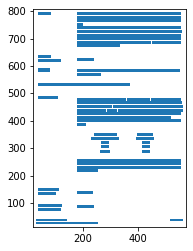

In [38]:
camelot.plot(tables_region[0], kind='text').show()

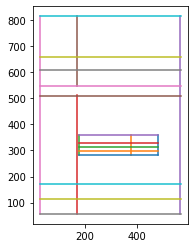

In [39]:
camelot.plot(tables_region[0], kind='line').show()

In [43]:
tables_4 = camelot.read_pdf('table_regions.pdf', flavor='stream', table_areas=['170,370,560,270'])

In [44]:
tables_4[0].df

,0,1
0,Età dell’Assicurato,Misura % di
1,all’epoca del decesso,maggiorazione
2,18-75,"1,00%"
3,76-80,"0,50%"
4,81 in poi,"0,10%"


Specify column separators¶
In cases like these, where the text is very close to each other, it is possible that Camelot may guess the column separators’ coordinates incorrectly. To correct this, you can explicitly specify the x coordinate for each column separator by plotting the text on the page.

You can pass the column separators as a list of comma-separated strings to read_pdf(), using the columns keyword argument.

In case you passed a single column separators string list, and no table area is specified, the separators will be applied to the whole page. When a list of table areas is specified and you need to specify column separators as well, the length of both lists should be equal. Each table area will be mapped to each column separators’ string using their indices.

For example, if you have specified two table areas, table_areas=['12,54,43,23', '20,67,55,33'], and only want to specify column separators for the first table, you can pass an empty string for the second table in the column separators’ list like this, columns=['10,120,200,400', ''].

Let’s get back to the x coordinates we got from plotting the text that exists on this PDF, and get the table out!



In [45]:
tables_5 = camelot.read_pdf('column_separators.pdf', flavor='stream', columns=['72,95,209,327,442,529,566,606,683'])

In [46]:
tables_5[0].df

,0,1,2,3,4,5,6,7,8,9
0,,FEBRUARY 2014 M27 (BUS),,,,,,,,
1,,,,,OF ACTIVE LICENSES,,,,,3/19/2014
2,,,,,OKLAHOMA ABLE COMMISSION,,,,,
3,LICENSE,,,,PREMISE,,,,,
4,NUMBER TYPE DBA NAME,,,LICENSEE NAME,ADDRESS,CITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,,648765 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,,,OK,73159,-,2014/12/03
6,,,,,7777 EAST APACHE,,,,,
7,,648766 AAA,,ALLEGIANT AIR ALLEGIANT AIR...,STREET,TULSA,OK,74115,-,2014/12/16
8,,82030 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,,OK,73159,(405) 680-3701,2014/09/14
9,,509462 AAA,,AMERICAN AIRLINES AMERICAN AIRLINES ...,,,OK,74115,(918) 831-6302,2014/08/19


Ah! Since PDFMiner merged the strings, “NUMBER”, “TYPE” and “DBA NAME”, all of them were assigned to the same cell. Let’s see how we can fix this in the next section.



To deal with cases like the output from the previous section, you can pass split_text=True to read_pdf(), which will split any strings that lie in different cells but have been assigned to a single cell (as a result of being merged together by PDFMiner).



In [47]:
tables_5 = camelot.read_pdf('column_separators.pdf', flavor='stream', columns=['72,95,209,327,442,529,566,606,683'], split_text=True)

In [48]:
tables_5[0].df

,0,1,2,3,4,5,6,7,8,9
0,FEB,RUAR,Y 2014 M27 (BUS),,,,,,,
1,,,,,OF ACTIVE LICENSES,,,,,3/19/2014
2,,,,,OKLAHOMA ABLE COMMIS,SION,,,,
3,LICENSE,,,,PREMISE,,,,,
4,NUMBER,TYPE,DBA NAME,LICENSEE NAME,ADDRESS,CITY,ST,ZIP,PHONE NUMBER,EXPIRES
5,648765,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,-,2014/12/03
6,,,,,7777 EAST APACHE,,,,,
7,648766,AAA,ALLEGIANT AIR,ALLEGIANT AIR LLC,STREET,TULSA,OK,74115,-,2014/12/16
8,82030,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7100 TERMINAL DRIVE,OKLAHOMA CITY,OK,73159,(405) 680-3701,2014/09/14
9,509462,AAA,AMERICAN AIRLINES,AMERICAN AIRLINES INC,7777 EAST APACHE DRIVE,TULSA,OK,74115,(918) 831-6302,2014/08/19


Flag superscripts and subscripts¶
There might be cases where you want to differentiate between the text and superscripts or subscripts, like this PDF.



In this case, the text that other tools return, will be 24.912. This is relatively harmless when that decimal point is involved. But when it isn’t there, you’ll be left wondering why the results of your data analysis are 10x bigger!



You can solve this by passing flag_size=True, which will enclose the superscripts and subscripts with <s></s>, based on font size, as shown below.



In [49]:
tables_6 = camelot.read_pdf('superscript.pdf', flavor='stream', flag_size=True)

In [50]:
tables_6[0].df

,0,1,2,3,4,5,6,7,8,9,10
0,States,Total,Market,NSSF,WMA,Loans,Loans,Loans,Loans,Loans,Loans
1,,Internal,Loans,,from,from,from,from,from,from SBI,from
2,,Debt,,,RBI,Banks,LIC,GIC,NABARD,& Other,NCDC
3,,,,,,& FIs,,,,Banks,
4,1,2=,3,4,5,6=,7,8,9,10,11
5,,(3 to 6)+14,,,,(7 to13),,,,,
6,Andhra Pradesh,48.11,40.45,-,3.26,4.4,2.62,-,0.91,-,0.25
7,Arunachal Pradesh,1.23,1.1,-,-,0.13,-,-,-,-,-
8,Assam,12.69,10.02,-,2.41,0.26,0.08,-,-0.06,0.01,0.24
9,Bihar,40.75,41.54,-,-,-1.42,0.19,-,-1.01,-0.36,0.2


Strip characters from text¶
You can strip unwanted characters like spaces, dots and newlines from a string using the strip_text keyword argument. Take a look at this PDF as an example, the text at the start of each row contains a lot of unwanted spaces, dots and newlines.



In [51]:
tables_7 = camelot.read_pdf('12s0324.pdf', flavor='stream', strip_text=' .\n')

In [52]:
tables_7[0].df

,0,1,2,3,4,5,6,7,8,9
0,ProgramRepresentsarrestsreported(notcharged)by...,,,,,,,,,
1,bytheFBISomepersonsmaybearrestedmorethanoncedu...,,,,,,,,,
2,couldrepresentmultiplearrestsofthesamepersonSe...,,,,,,,,,
3,,,Total,,,Male,,,Female,
4,Offensecharged,,Under18,18years,,Under18,18years,,Under18,18years
5,,Total,years,andover,Total,years,andover,Total,years,andover
6,Total,"11,0626","1,5400","9,5226","8,2633","1,0716","7,1917","2,7992",4683,"2,3309"
7,Violentcrime,4679,691,3988,3802,565,3237,877,126,752
8,Murderandnonnegligent,,,,,,,,,
9,manslaughter,100,09,91,90,09,81,11,–,10


Improve guessed table areas¶
While using Stream, automatic table detection can fail for PDFs like this one. That’s because the text is relatively far apart vertically, which can lead to shorter textedges being calculated.

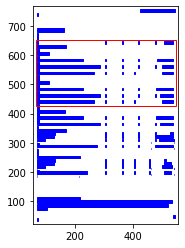

In [53]:
tables_8 = camelot.read_pdf('edge_tol.pdf', flavor='stream')
camelot.plot(tables_8[0], kind='contour').show()

To improve the detected area, you can increase the edge_tol (default: 50) value to counter the effect of text being placed relatively far apart vertically. Larger edge_tol will lead to longer textedges being detected, leading to an improved guess of the table area. Let’s use a value of 500.



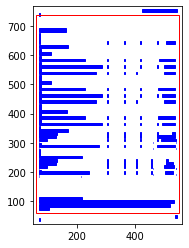

In [54]:
tables_9 = camelot.read_pdf('edge_tol.pdf', flavor='stream', edge_tol=500)
camelot.plot(tables_9[0], kind='contour').show()

Improve guessed table rows¶
You can pass row_tol=<+int> to group the rows closer together, as shown below.

In [55]:
# tables = camelot.read_pdf('group_rows.pdf', flavor='stream')
# tables[0].df
# tables = camelot.read_pdf('group_rows.pdf', flavor='stream', row_tol=10)
# tables[0].df

Detect short lines¶
There might be cases while using Lattice when smaller lines don’t get detected. The size of the smallest line that gets detected is calculated by dividing the PDF page’s dimensions with a scaling factor called line_scale. By default, its value is 15.



As you can guess, the larger the line_scale, the smaller the size of lines getting detected.



Making line_scale very large (>150) will lead to text getting detected as lines.



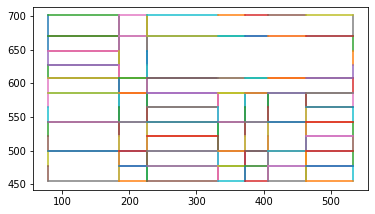

In [56]:
tables_10 = camelot.read_pdf('short_lines.pdf')
camelot.plot(tables_10[0], kind='grid').show()

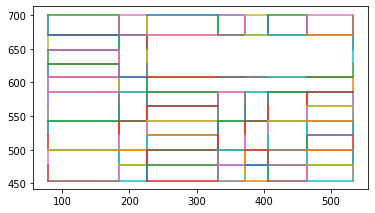

In [57]:
tables_11 = camelot.read_pdf('short_lines.pdf', line_scale=40)
camelot.plot(tables_11[0], kind='grid').show()

In [58]:
tables_11[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,2400,All the available individuals,,,,
2,Clinical Examination,,,,,,
3,History of morbidity,,,,,,
4,Diet survey,1200,All the individuals partaking meals in the HH,,,,
5,Blood Pressure #,2400,Men (≥ 18yrs),10%,95%,20%,1728
6,,,Women (≥ 18 yrs),,,,1728
7,Fasting blood glucose,2400,Men (≥ 18 yrs),5%,95%,20%,1825
8,,,Women (≥ 18 yrs),,,,1825
9,Knowledge &\nPractices on HTN &\nDM,2400,Men (≥ 18 yrs),-,-,-,1728


Shift text in spanning cells
By default, the Lattice method shifts text in spanning cells, first to the left and then to the top, as you can observe in the output table above. However, this behavior can be changed using the shift_text keyword argument. Think of it as setting the gravity for a table — it decides the direction in which the text will move and finally come to rest.

shift_text expects a list with one or more characters from the following set: ('', l', 'r', 't', 'b'), which are then applied in order. The default, as we discussed above, is ['l', 't'].

We’ll use the PDF from the previous example. Let’s pass shift_text=[''], which basically means that the text will experience weightlessness! (It will remain in place.)



In [59]:
tables_12 = camelot.read_pdf('short_lines.pdf', line_scale=40, shift_text=[''])

In [60]:
tables_12[0].df


,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,,,,,,
2,Clinical Examination,2400,,All the available individuals,,,
3,History of morbidity,,,,,,
4,Diet survey,1200,,All the individuals partaking meals in the HH,,,
5,,,Men (≥ 18yrs),,,,1728
6,Blood Pressure #,2400,Women (≥ 18 yrs),10%,95%,20%,1728
7,,,Men (≥ 18 yrs),,,,1825
8,Fasting blood glucose,2400,Women (≥ 18 yrs),5%,95%,20%,1825
9,Knowledge &\nPractices on HTN &,2400,Men (≥ 18 yrs),-,-,-,1728


No surprises there — it did remain in place (observe the strings “2400” and “All the available individuals”). Let’s pass shift_text=['r', 'b'] to set the gravity to right-bottom and move the text in that direction.



In [61]:
tables_13 = camelot.read_pdf('short_lines.pdf', line_scale=40, shift_text=['r', 'b'])
tables_13[0].df

,0,1,2,3,4,5,6
0,Investigations,No. of\nHHs,Age/Sex/\nPhysiological Group,Preva-\nlence,C.I*,Relative\nPrecision,Sample size\nper State
1,Anthropometry,,,,,,
2,Clinical Examination,,,,,,
3,History of morbidity,2400,,,,,All the available individuals
4,Diet survey,1200,,,,,All the individuals partaking meals in the HH
5,,,Men (≥ 18yrs),,,,1728
6,Blood Pressure #,2400,Women (≥ 18 yrs),10%,95%,20%,1728
7,,,Men (≥ 18 yrs),,,,1825
8,Fasting blood glucose,2400,Women (≥ 18 yrs),5%,95%,20%,1825
9,,2400,Men (≥ 18 yrs),-,-,-,1728


Copy text in spanning cells¶
You can copy text in spanning cells when using Lattice, in either the horizontal or vertical direction, or both. This behavior is disabled by default.

copy_text expects a list with one or more characters from the following set: ('v', 'h'), which are then applied in order.

Let’s try it out on this PDF. First, let’s check out the output table to see if we need to use any other configuration parameters.

In [62]:
tables_14 = camelot.read_pdf('copy_text.pdf')
tables_14[0].df

,0,1,2,3,4,5,6,7,8,9
0,Sl. \nNo.,Name of \nState/UT,Name of \nDistrict,Disease/ Illness,No. of \nCases,No. of \nDeaths,Date of \nstart of \noutbreak,Date of \nreporting,Current \nStatus,Comments/ Action taken
1,1,Kerala,Kollam,i. Food \nPoisoning,19,0,31/12/13,03/01/14,Under \ncontrol,"Cases reported from Ward no III, Kottakupuram,..."
2,2,Maharashtra,Beed,i\ni. Dengue & \nChikungun\nya,11,0,03/01/14,04/01/14,Under \ncontrol,Cases of fever reported from Village Golharw...
3,3,Odisha,Kalahandi,iii. Food \nPoisoning,42,0,02/01/14,03/01/14,Under \ncontrol,Cases \nof \nloose motion \nand \nvomiting \n...
4,4,West Bengal,West \nMedinipur,iv. Acute \nDiarrhoeal \nDisease,145,0,04/01/14,05/01/14,Under \ncontrol,Outbreak of diarrhoea \nreported \nfrom Vil...
5,,,Birbhum,v. Food \nPoisoning,199,0,31/12/13,31/12/13,Under \ncontrol,An outbreak of food poisoning reported f...
6,,,Howrah,vi. Viral \nHepatitis A \n&E,85,0,26/12/13,27/12/13,Under \nsurveillance,Outbreak of \njaundice reported from urban...


We don’t need anything else. Now, let’s pass copy_text=['v'] to copy text in the vertical direction. This can save you some time by not having to add this step in your cleaning script!



In [63]:
tables = camelot.read_pdf('copy_text.pdf', copy_text=['v'])
tables[0].df

,0,1,2,3,4,5,6,7,8,9
0,Sl. \nNo.,Name of \nState/UT,Name of \nDistrict,Disease/ Illness,No. of \nCases,No. of \nDeaths,Date of \nstart of \noutbreak,Date of \nreporting,Current \nStatus,Comments/ Action taken
1,1,Kerala,Kollam,i. Food \nPoisoning,19,0,31/12/13,03/01/14,Under \ncontrol,"Cases reported from Ward no III, Kottakupuram,..."
2,2,Maharashtra,Beed,i\ni. Dengue & \nChikungun\nya,11,0,03/01/14,04/01/14,Under \ncontrol,Cases of fever reported from Village Golharw...
3,3,Odisha,Kalahandi,iii. Food \nPoisoning,42,0,02/01/14,03/01/14,Under \ncontrol,Cases \nof \nloose motion \nand \nvomiting \n...
4,4,West Bengal,West \nMedinipur,iv. Acute \nDiarrhoeal \nDisease,145,0,04/01/14,05/01/14,Under \ncontrol,Outbreak of diarrhoea \nreported \nfrom Vil...
5,4,West Bengal,Birbhum,v. Food \nPoisoning,199,0,31/12/13,31/12/13,Under \ncontrol,An outbreak of food poisoning reported f...
6,4,West Bengal,Howrah,vi. Viral \nHepatitis A \n&E,85,0,26/12/13,27/12/13,Under \nsurveillance,Outbreak of \njaundice reported from urban...


Tweak layout generation¶
Camelot is built on top of PDFMiner’s functionality of grouping characters on a page into words and sentences. In some cases (such as #170 and #215), PDFMiner can group characters that should belong to the same sentence into separate sentences.

To deal with such cases, you can tweak PDFMiner’s LAParams kwargs to improve layout generation, by passing the keyword arguments as a dict using layout_kwargs in read_pdf(). To know more about the parameters you can tweak, you can check out PDFMiner docs.

In [64]:
tables_15 = camelot.read_pdf('foo.pdf', layout_kwargs={'detect_vertical': False})

In [65]:
tables_15[0].df

,0,1,2,3,4,5,6
0,Cycle \nName,KI \n(1/km),Distance \n(mi),Percent Fuel Savings,,,
1,,,,Improved \nSpeed,Decreased \nAccel,Eliminate \nStops,Decreased \nIdle
2,2012_2,3.30,1.3,5.9%,9.5%,29.2%,17.4%
3,2145_1,0.68,11.2,2.4%,0.1%,9.5%,2.7%
4,4234_1,0.59,58.7,8.5%,1.3%,8.5%,3.3%
5,2032_2,0.17,57.8,21.7%,0.3%,2.7%,1.2%
6,4171_1,0.07,173.9,58.1%,1.6%,2.1%,0.5%


Use alternate image conversion backends¶
When using the Lattice flavor, Camelot uses ghostscript to convert PDF pages to images for line recognition. If you face installation issues with ghostscript, you can use an alternate image conversion backend called poppler. You can specify which image conversion backend you want to use with:



In [66]:
# tables = camelot.read_pdf(filename, backend="ghostscript")  # default
# tables = camelot.read_pdf(filename, backend="poppler")

ghostscript will be replaced by poppler as the default image conversion backend in v0.12.0.



#Lets try some other examples.

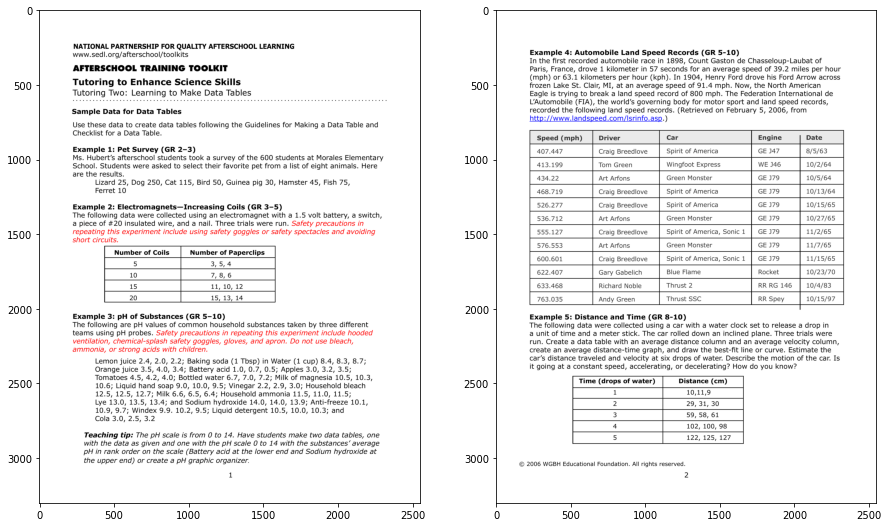

In [81]:
PDF = '/content/ast_sci_data_tables_sample.pdf'
pdf_img = convert_from_path(PDF, dpi=300)[0]
pdf_img1 = convert_from_path(PDF, dpi=300)[1]

plt.figure(figsize=(15, 10))
plt.axis('off')
plt.subplot(1, 2, 1)
plt.imshow(pdf_img)
plt.subplot(1, 2, 2)
plt.imshow(pdf_img1)

In [19]:
tables = camelot.read_pdf('ast_sci_data_tables_sample.pdf', pages='2')

In [20]:
tables

<TableList n=2>

In [21]:
tables[0]

<Table shape=(14, 5)>

In [22]:
tables[0].df

,0,1,2,3,4
0,Speed (mph),Driver,Car,Engine\nDate,
1,407.447,Craig Breedlove,Spirit of America,GE J47\n8/5/63,
2,413.199,Tom Green,Wingfoot Express,WE J46 \n10/2/64,
3,434.22,Art Arfons,Green Monster,GE J79 \n10/5/64,
4,468.719,Craig Breedlove,Spirit of America,GE J79 \n10/13/64,
5,526.277,Craig Breedlove,Spirit of America,GE J79 \n10/15/65,
6,536.712,Art Arfons,Green Monster,GE J79 \n10/27/65,
7,555.127,Craig Breedlove,"Spirit of America, Sonic 1",GE J79 \n11/2/65,
8,576.553,Art Arfons,Green Monster,GE J79 \n11/7/65,
9,600.601,Craig Breedlove,"Spirit of America, Sonic 1",GE J79 \n11/15/65,


In [23]:
tables[1].df

,0,1
0,Time (drops of water) Distance (cm),
1,1,"10,11,9"
2,2,"29, 31, 30"
3,3,"59, 58, 61"
4,4,"102, 100, 98"
5,5,"122, 125, 127"


In [24]:
tables = camelot.read_pdf('/content/medicine.pdf')

In [26]:
tables[0]

<Table shape=(29, 10)>

In [28]:
tables[0].df[1:]

,0,1,2,3,4,5,6,7,8,9
1,Med\nNo,Item \nSr. No,Drug name,Category,Specification,Packing,Level of use,,,
2,,,,,,,Sub \ncentre,PHC,Hospital,Tertiary \nHospital
3,1,1,Lignocaine HCI I.P Inj.,Anaesthetics,Inj. Lignocaine OR Lidocaine OR Xylocaine HC...,30 ml,,Y,Y,Y
4,,2,Lignocaine HCI I.P Inj.,Anaesthetics,Inj. Lignocaine or Lidocaine OR Xylocaine HCL...,30 ml,,Y,Y,Y
5,,3,Lignocaine Hydrochloride \nIP with dextrose \n...,Anaesthetics,Inj. Xylocaine OR Lignocaine OR Lidocaine 5% \...,2 ml,,Y,Y,Y
6,,4,Topical Lignocaine,Anaesthetics,Oint Lignocaine Or Lidocaine OR Xylocaine HC...,30 gm,,Y,Y,Y
7,,5,Topical Lignocaine,Anaesthetics,Oint Lignocaine Or Lidocaine OR Xylocaine HC...,10 gm,,Y,Y,Y
8,,6,Topical Lignocaine ( \nXylocaine ),Anaesthetics,Inj. Xylocaine 4% Topical 30 ml,30 ml,,,Y,Y
9,,7,Lignocaine with \nAdrenaline Inj.,Anaesthetics,Lignocaine OR Lidocaine or Xylocaine hcl 20mg...,30 ml,,Y,Y,Y
10,2,1,Inj Bupivacaine \nHydrochloride,Anaesthetics,Inj Bupivacaine Hydrochloride 50mg/10ml,20 ml,,,Y,Y


In [29]:
tables = camelot.read_pdf('/content/twotables_2.pdf')

In [46]:
table = list(tables)
table

[<Table shape=(13, 8)>, <Table shape=(13, 8)>]

In [68]:
import pandas as pd
df = tables[0].df
df1 = tables[1].df[2:]
df=pd.concat([df,df1],axis=0,ignore_index=True)

In [69]:
df

,0,1,2,3,4,5,6,7
0,State,n,Literacy Status,,,,,
1,,,Illiterate,Read & \nWrite,1-4 std.,5-8 std.,9-12 std.,College
2,Kerala,2400,7.2,0.5,25.3,20.1,41.5,5.5
3,Tamil Nadu,2400,21.4,2.3,8.8,35.5,25.8,6.2
4,Karnataka,2399,37.4,2.8,12.5,18.3,23.1,5.8
5,Andhra Pradesh,2400,54.0,1.7,8.4,13.2,18.8,3.9
6,Maharashtra,2400,22.0,0.9,17.3,20.3,32.6,7.0
7,Gujarat,2390,28.6,0.1,14.4,23.1,26.9,6.8
8,Madhya Pradesh,2402,29.1,3.4,8.5,35.1,13.3,10.6
9,Orissa,2405,33.2,1.0,10.4,25.7,21.2,8.5
